In [ ]:
# Import modules
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from IPython.display import Image
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf # This is the R-style formulas option
import seaborn as sns

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
 #connect Google Drive directly to the Google Colab environment
from google.colab import drive
drive.mount('/content/drive')
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mounted at /content/drive
Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [ ]:
%%html
<marquee style='width: 30%; color: hotpink;'><b>Ready to code!!!!</b></marquee>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#OPEN FILE
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df = pd.read_excel('/content/drive/MyDrive/BROOKE/ffs.xlsx')
df.head(10)


,name,reduction,type,precision,recall,f1
0,DT,No DR,Healthy,0.92,0.96,0.94
1,DT,No DR,non-TNBC,0.93,0.97,0.95
2,DT,No DR,TNBC,0.71,0.48,0.57
3,DT,PCA,Healthy,0.25,0.12,0.17
4,DT,PCA,non-TNBC,0.81,0.97,0.88
5,DT,PCA,TNBC,0.00,0.00,0.00
6,DT,PSO,Healthy,0.94,0.73,0.82
7,DT,PSO,non-TNBC,0.94,0.95,0.95
8,DT,PSO,TNBC,0.65,0.79,0.71
9,DT,SAE,Healthy,0.94,0.85,0.89


In [ ]:

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#RANK INDIVIDUAL PERFORMANCE MEASURES
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df['precision_rank'] = df['precision'].rank()
df['recall_rank'] = df['recall'].rank()
df['f1_rank'] = df['f1'].rank()
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#SUM RANKS + RANK SUMS + SORT
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
df['sum_rank'] = df['f1_rank'] + df['recall_rank'] + df['precision_rank']
df['final_rank'] = df['sum_rank'].rank()
hi = df.sort_values(by='final_rank',  ascending=False)
print(hi)
hi.to_excel('/content/drive/MyDrive/BROOKE/rank.xlsx')

        name reduction      type  ...  f1_rank  sum_rank  final_rank
61        RF       PSO  non-TNBC  ...     89.5     251.5        90.0
73  SVM(rbf)     No DR  non-TNBC  ...     89.5     250.0        89.0
55        RF     No DR  non-TNBC  ...     88.0     245.0        88.0
40        NB       PCA  non-TNBC  ...     85.5     243.0        87.0
79  SVM(rbf)       PSO  non-TNBC  ...     85.5     241.5        86.0
..       ...       ...       ...  ...      ...       ...         ...
83  SVM(rbf)       SAE      TNBC  ...      3.5      10.5         3.5
84  SVM(rbf)      SDAE   Healthy  ...      3.5      10.5         3.5
86  SVM(rbf)      SDAE      TNBC  ...      3.5      10.5         3.5
5         DT       PCA      TNBC  ...      3.5      10.5         3.5
89  SVM(rbf)      tSNE      TNBC  ...      3.5      10.5         3.5

[90 rows x 11 columns]


# GRAPHS AND FIGURES

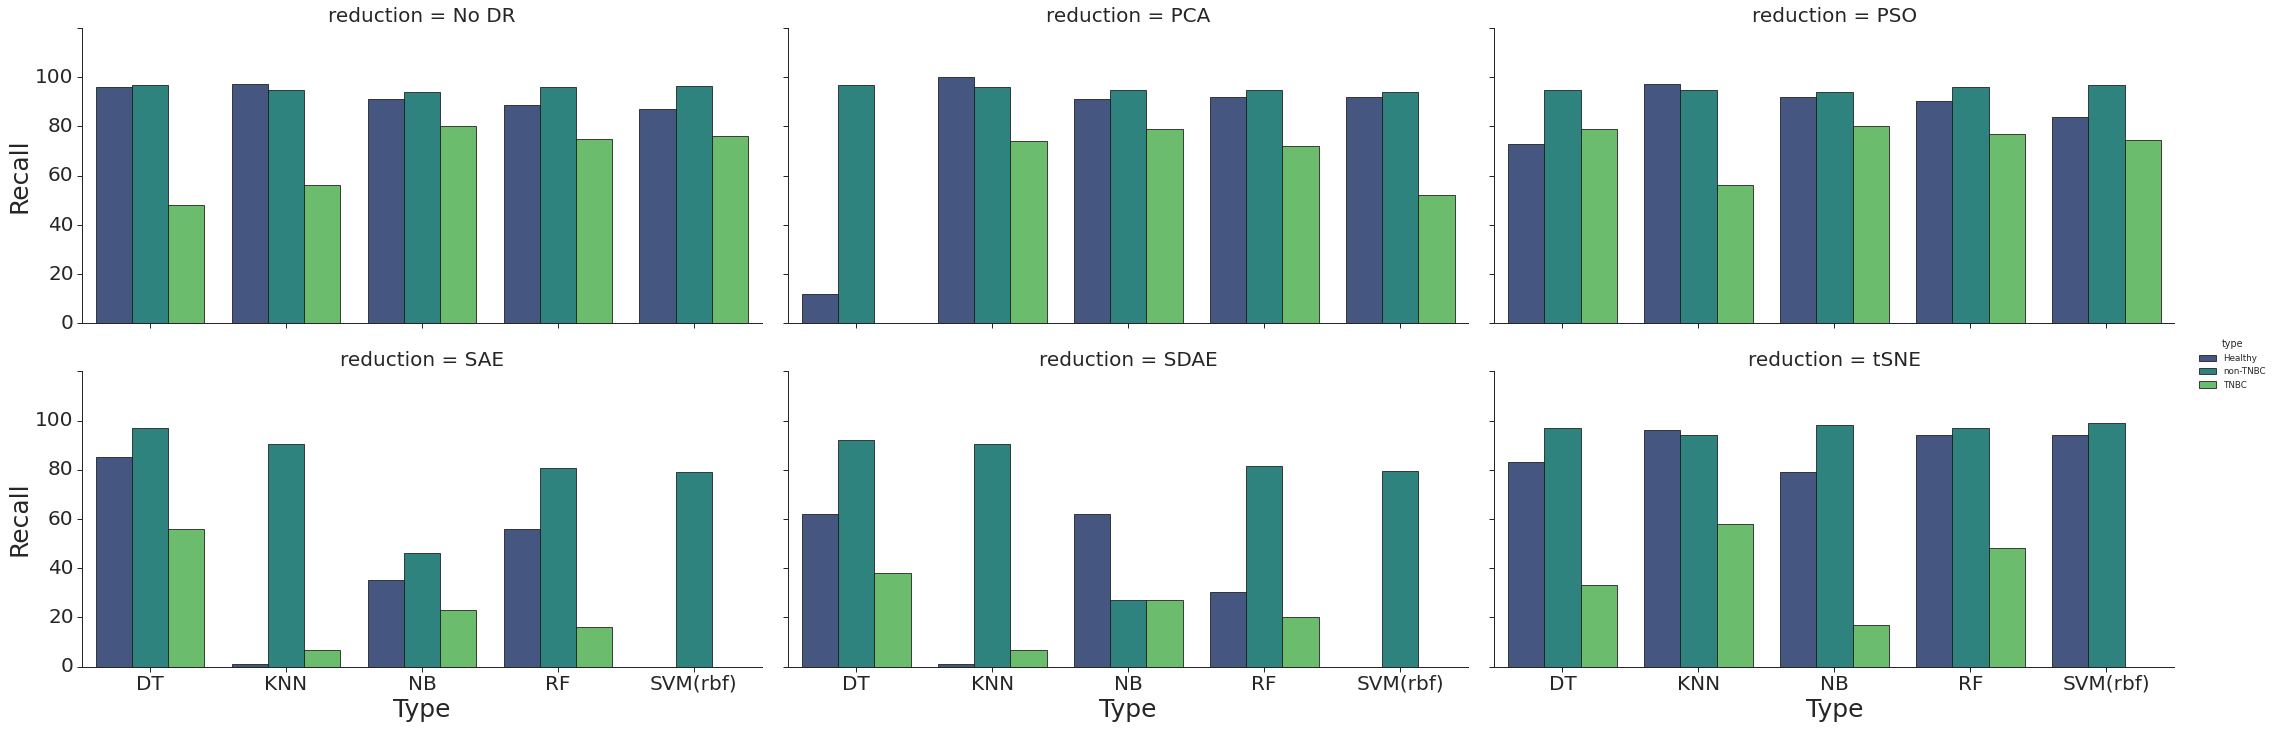

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE RECALL BAR GRAPH
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sns.set_theme(style="ticks", palette="bright")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_palette("viridis",3)

g = sns.catplot(x="name", y="recall", kind="bar",col="reduction", 
                aspect=2, col_wrap=3, hue="type", edgecolor=".1", capsize=0.2,errwidth=1.5, data=df)

g.set_xlabels("Type", size=25)
g.set_ylabels("Recall", size=25)
g.set_xticklabels(size=20)
g.set_yticklabels(labels= [0, 20, 40, 60, 80, 100], fontdict={'fontsize': 20,  
                                                              'fontweight': 12, 
                                                              'verticalalignment': 'center', 
                                                              'horizontalalignment': 'right'})


g.savefig("/content/drive/MyDrive/BROOKE/recall_output.png")

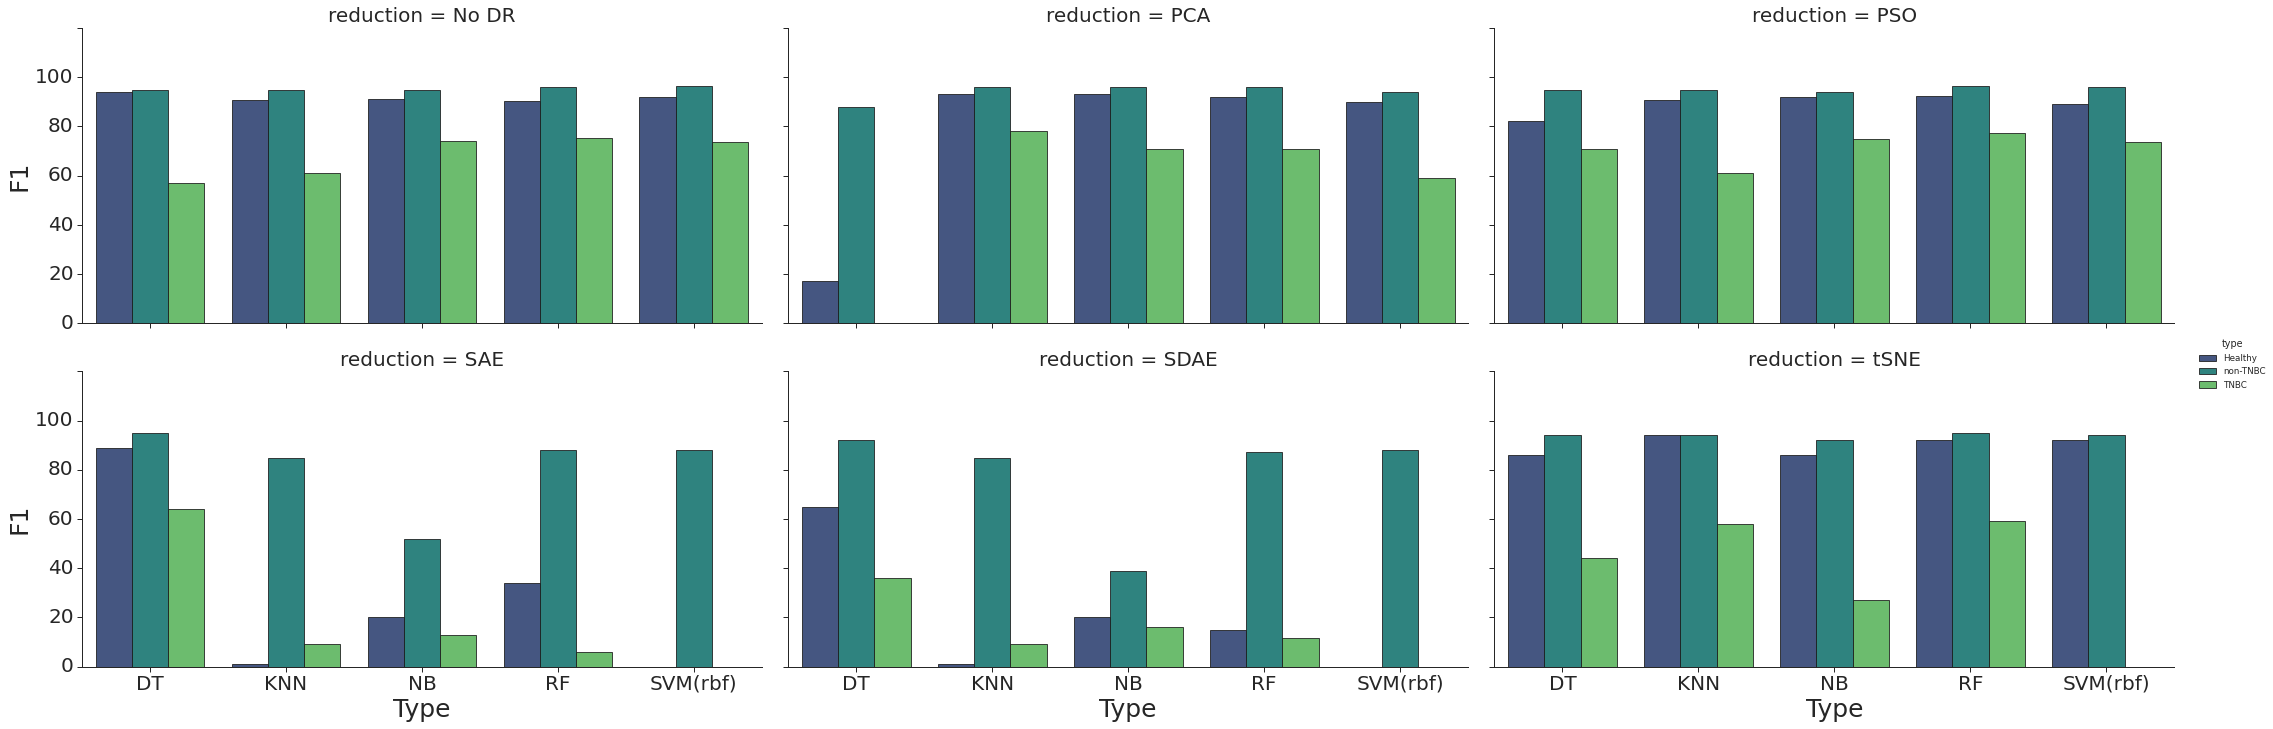

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE F1 BAR GRAPH
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sns.set_theme(style="ticks", palette="bright")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_palette("viridis",3)

g = sns.catplot(x="name", y="f1", kind="bar",col="reduction", aspect=2, col_wrap=3, hue="type", edgecolor=".1", capsize=0.2,errwidth=1.5, data=df)

g.set_xlabels("Type", size=25)
g.set_ylabels("F1", size=25)
g.set_xticklabels(size=20)
g.set_yticklabels(labels= [0, 20, 40, 60, 80, 100], fontdict={'fontsize': 20,  'fontweight': 12, 'verticalalignment': 'center', 'horizontalalignment': 'right'})
#plt.legend(loc='lower right', fontsize=15)

g.savefig("/content/drive/MyDrive/BROOKE/f1_output.png")

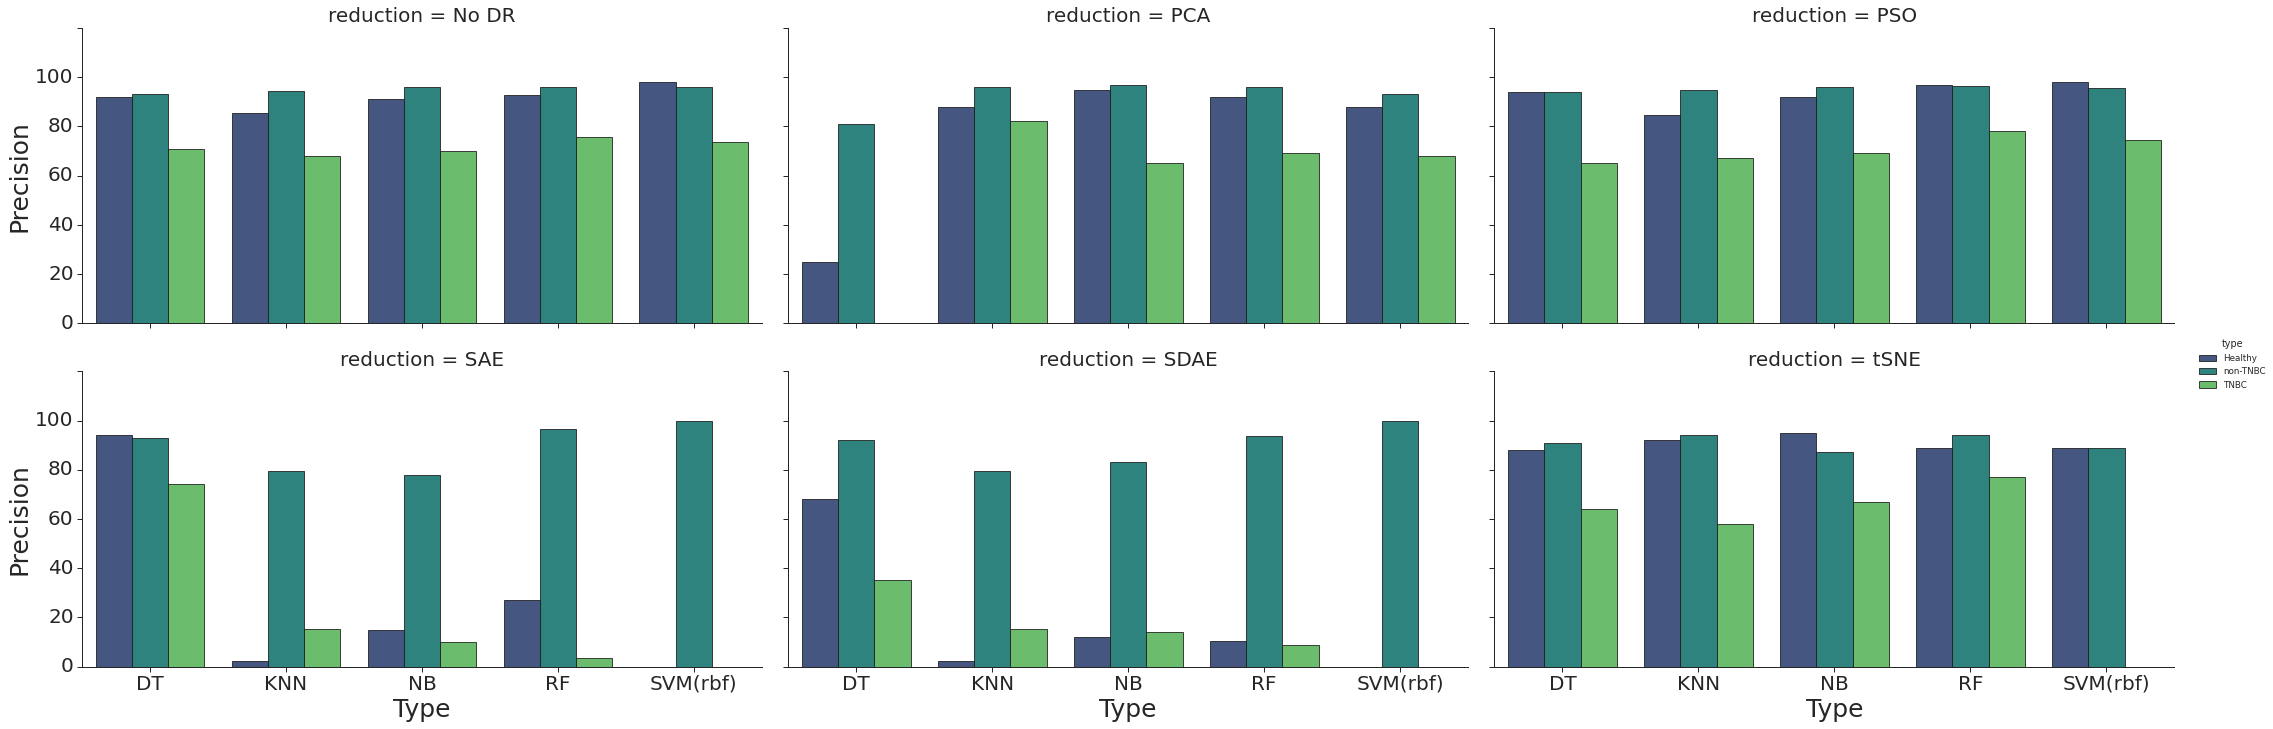

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE PRECITION BAR GRAPH
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sns.set_theme(style="ticks", palette="bright")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_palette("viridis",3)

g = sns.catplot(x="name", y="precision", kind="bar",col="reduction", aspect=2, col_wrap=3, hue="type", edgecolor=".1", capsize=0.2,errwidth=1.5, data=df) #REAL

g.set_xlabels("Type", size=25)
g.set_ylabels("Precision", size=25)
g.set_xticklabels(size=20)
g.set_yticklabels(labels= [0, 20, 40, 60, 80, 100], fontdict={'fontsize': 20,  'fontweight': 12, 'verticalalignment': 'center', 'horizontalalignment': 'right'})
#plt.legend(loc='lower right', fontsize=15)

g.savefig("/content/drive/MyDrive/BROOKE/precision_output.png")

In [ ]:
from scipy import stats
#df.head(50)

# 


# INDEPENDENT TTEST

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#INDEPENDENT TTEST
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dt_p = df.loc[0:17, 'precision']
dt_r = df.loc[0:17, 'recall']
dt_f = df.loc[0:17, 'f1']
knn_p = df.loc[18:35, 'precision']
knn_r = df.loc[18:35, 'recall']
knn_f = df.loc[18:35, 'f1']
nb_p = df.loc[36:53, 'precision']
nb_r = df.loc[36:53, 'recall']
nb_f = df.loc[36:53, 'f1']
rf_p = df.loc[54:71, 'precision']
rf_r = df.loc[54:71, 'recall']
rf_f = df.loc[54:71, 'f1']
svm_p = df.loc[72:89, 'precision']
svm_r = df.loc[72:89, 'recall']
svm_f = df.loc[72:89, 'f1']



In [ ]:

#.................
#rf and svm
#`````````````````
print('the independent t-test results for rf and svm')
#PRECISION
rf_svm_p = stats.ttest_ind(rf_p,svm_p)
print('precision: ')
if rf_svm_p[1] < 0.05:
  print('t-statistic = ', rf_svm_p.statistic, 'p-value = ', 
        rf_svm_p.pvalue, 'the results are significant')
if rf_svm_p[1] > 0.05:
  print('the results are not significant')


#RECALL
rf_svm_r = stats.ttest_ind(rf_r,svm_r)
print('recall: ')
if rf_svm_r[1] < 0.05:
  print('t-statistic = ', rf_svm_r.statistic, 'p-value = ', rf_svm_r.pvalue, 'the results are significant')
if rf_svm_r[1] > 0.05:
  print('the results are not significant')


#F-1 SCORE
rf_svm_f = stats.ttest_ind(rf_f,svm_f)
print('F-1: ')
if rf_svm_f[1] < 0.05:
  print('t-statistic = ', rf_svm_f.statistic, 'p-value = ', rf_svm_f.pvalue, 'the results are significant')
if rf_svm_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')
#.................
#knn and svm
#`````````````````
print('the independent t-test results for knn and svm')
#PRECISION
knn_svm_p = stats.ttest_ind(knn_p,svm_p)
print('precision: ')
if knn_svm_p[1] < 0.05:
  print('t-statistic = ', knn_svm_p.statistic, 'p-value = ', knn_svm_p.pvalue, 'the results are significant')
if knn_svm_p[1] > 0.05:
  print('the results are not significant')

#RECALL
knn_svm_r = stats.ttest_ind(knn_r,svm_r)
print('recall: ')
if knn_svm_r[1] < 0.05:
  print('t-statistic = ', knn_svm_r.statistic, 'p-value = ', knn_svm_r.pvalue, 'the results are significant')
if knn_svm_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
knn_svm_f = stats.ttest_ind(knn_f,svm_f)
print('F-1: ')
if knn_svm_f[1] < 0.05:
  print('t-statistic = ', knn_svm_f.statistic, 'p-value = ', knn_svm_f.pvalue, 'the results are significant')
if knn_svm_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#knn and rf
#`````````````````
print('the independent t-test results for knn and rf')
#PRECISION
knn_rf_p = stats.ttest_ind(knn_p,rf_p)
print('precision: ')
if knn_rf_p[1] < 0.05:
  print('t-statistic = ', knn_rf_p.statistic, 'p-value = ', knn_rf_p.pvalue, 'the results are significant')
if knn_rf_p[1] > 0.05:
  print('the results are not significant')

#RECALL
knn_rf_r = stats.ttest_ind(knn_r,rf_r)
print('recall: ')
if knn_rf_r[1] < 0.05:
  print('t-statistic = ', knn_rf_r.statistic, 'p-value = ', knn_rf_r.pvalue, 'the results are significant')
if knn_rf_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
knn_rf_f = stats.ttest_ind(knn_f,rf_f)
print('F-1: ')
if knn_rf_f[1] < 0.05:
  print('t-statistic = ', knn_rf_f.statistic, 'p-value = ', knn_rf_f.pvalue, 'the results are significant')
if knn_rf_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#knn and dt
#`````````````````
print('the independent t-test results for knn and dt')
#PRECISION
knn_dt_p = stats.ttest_ind(knn_p,dt_p)
print('precision: ')
if knn_dt_p[1] < 0.05:
  print('t-statistic = ', knn_dt_p.statistic, 'p-value = ', knn_dt_p.pvalue, 'the results are significant')
if knn_dt_p[1] > 0.05:
  print('the results are not significant')

#RECALL
knn_dt_r = stats.ttest_ind(knn_r,dt_r)
print('recall: ')
if knn_dt_r[1] < 0.05:
  print('t-statistic = ', knn_dt_r.statistic, 'p-value = ', knn_dt_r.pvalue, 'the results are significant')
if knn_dt_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
knn_dt_f = stats.ttest_ind(knn_f,dt_f)
print('F-1: ')
if knn_dt_f[1] < 0.05:
  print('t-statistic = ', knn_dt_f.statistic, 'p-value = ', knn_dt_f.pvalue, 'the results are significant')
if knn_dt_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#knn and nb
#`````````````````
print('the independent t-test results for knn and nb')
#PRECISION
knn_nb_p = stats.ttest_ind(knn_p,nb_p)
print('precision: ')
if knn_nb_p[1] < 0.05:
  print('t-statistic = ', knn_nb_p.statistic, 'p-value = ', knn_nb_p.pvalue, 'the results are significant')
if knn_nb_p[1] > 0.05:
  print('the results are not significant')

#RECALL
knn_nb_r = stats.ttest_ind(knn_r,nb_r)
print('recall: ')
if knn_nb_r[1] < 0.05:
  print('t-statistic = ', knn_nb_r.statistic, 'p-value = ', knn_nb_r.pvalue, 'the results are significant')
if knn_nb_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
knn_nb_f = stats.ttest_ind(knn_f,nb_f)
print('F-1: ')
if knn_nb_f[1] < 0.05:
  print('t-statistic = ', knn_nb_f.statistic, 'p-value = ', knn_nb_f.pvalue, 'the results are significant')
if knn_nb_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#svm and nb
#`````````````````
print('the independent t-test results for svm and nb')
#PRECISION
svm_nb_p = stats.ttest_ind(svm_p,nb_p)
print('precision: ')
if svm_nb_p[1] < 0.05:
  print('t-statistic = ', svm_nb_p.statistic, 'p-value = ', svm_nb_p.pvalue, 'the results are significant')
if svm_nb_p[1] > 0.05:
  print('the results are not significant')

#RECALL
svm_nb_r = stats.ttest_ind(svm_r,nb_r)
print('recall: ')
if svm_nb_r[1] < 0.05:
  print('t-statistic = ', svm_nb_r.statistic, 'p-value = ', svm_nb_r.pvalue, 'the results are significant')
if svm_nb_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
svm_nb_f = stats.ttest_ind(svm_f,nb_f)
print('F-1: ')
if svm_nb_f[1] < 0.05:
  print('t-statistic = ', svm_nb_f.statistic, 'p-value = ', svm_nb_f.pvalue, 'the results are significant')
if svm_nb_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#rf and nb
#`````````````````
print('the independent t-test results for rf and nb')
#PRECISION
rf_nb_p = stats.ttest_ind(rf_p,nb_p)
print('precision: ')
if rf_nb_p[1] < 0.05:
  print('t-statistic = ', rf_nb_p.statistic, 'p-value = ', rf_nb_p.pvalue, 'the results are significant')
if rf_nb_p[1] > 0.05:
  print('the results are not significant')

#RECALL
rf_nb_r = stats.ttest_ind(rf_r,nb_r)
print('recall: ')
if rf_nb_r[1] < 0.05:
  print('t-statistic = ', rf_nb_r.statistic, 'p-value = ', rf_nb_r.pvalue, 'the results are significant')
if rf_nb_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
rf_nb_f = stats.ttest_ind(rf_f,nb_f)
print('F-1: ')
if rf_nb_f[1] < 0.05:
  print('t-statistic = ', rf_nb_f.statistic, 'p-value = ', rf_nb_f.pvalue, 'the results are significant')
if rf_nb_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#rf and dt
#`````````````````
print('the independent t-test results for rf and dt')
#PRECISION
rf_dt_p = stats.ttest_ind(rf_p,dt_p)
print('precision: ')
if rf_dt_p[1] < 0.05:
  print('t-statistic = ', rf_dt_p.statistic, 'p-value = ', rf_dt_p.pvalue, 'the results are significant')
if rf_dt_p[1] > 0.05:
  print('the results are not significant')

#RECALL
rf_dt_r = stats.ttest_ind(rf_r,dt_r)
print('recall: ')
if rf_dt_r[1] < 0.05:
  print('t-statistic = ', rf_dt_r.statistic, 'p-value = ', rf_dt_r.pvalue, 'the results are significant')
if rf_dt_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
rf_dt_f = stats.ttest_ind(rf_f,dt_f)
print('F-1: ')
if rf_dt_f[1] < 0.05:
  print('t-statistic = ', rf_dt_f.statistic, 'p-value = ', rf_dt_f.pvalue, 'the results are significant')
if rf_dt_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#svm and dt
#`````````````````
print('the independent t-test results for svm and dt')
#PRECISION
svm_dt_p = stats.ttest_ind(svm_p,dt_p)
print('precision: ')
if svm_dt_p[1] < 0.05:
  print('t-statistic = ', svm_dt_p.statistic, 'p-value = ', svm_dt_p.pvalue, 'the results are significant')
if svm_dt_p[1] > 0.05:
  print('the results are not significant')

#RECALL
svm_dt_r = stats.ttest_ind(svm_r,dt_r)
print('recall: ')
if svm_dt_r[1] < 0.05:
  print('t-statistic = ', svm_dt_r.statistic, 'p-value = ', svm_dt_r.pvalue, 'the results are significant')
if svm_dt_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
svm_dt_f = stats.ttest_ind(svm_f,dt_f)
print('F-1: ')
if svm_dt_f[1] < 0.05:
  print('t-statistic = ', svm_dt_f.statistic, 'p-value = ', svm_dt_f.pvalue, 'the results are significant')
if svm_dt_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')



the independent t-test results for rf and svm
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for knn and svm
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for knn and rf
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for knn and dt
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for knn and nb
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for svm and nb
precision: 
the re

# PAIRED TTEST - FEATURE REDUCTION


In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE VALUES FOR PAIRED TTEST - FEATURE REDUCTION
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
new = df.sort_values(by=['reduction'], ignore_index=True)

no_dr_p = new.loc[0:14, 'precision']
no_dr_r = new.loc[0:14, 'recall']
no_dr_f = new.loc[0:14, 'f1']
pca_p = new.loc[15:29, 'precision']
pca_r = new.loc[15:29, 'recall']
pca_f = new.loc[15:29, 'f1']
pso_p = new.loc[30:44, 'precision']
pso_r = new.loc[30:44, 'recall']
pso_f = new.loc[30:44, 'f1']
sae_p = new.loc[45:59, 'precision']
sae_r = new.loc[45:59, 'recall']
sae_f = new.loc[45:59, 'f1']
sdae_p = new.loc[60:74, 'precision']
sdae_r = new.loc[60:74, 'recall']
sdae_f = new.loc[60:74, 'f1']
tnse_p = new.loc[75:89, 'precision']
tnse_r = new.loc[75:89, 'recall']
tnse_f = new.loc[75:89, 'f1']

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#PAIRED TTEST - FEATURE REDUCTION
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#.................
#no_dr and pso
#`````````````````
print('the relependent t-test results for no_dr and pso')
#PRECISION
no_dr_pso_p = stats.ttest_rel(no_dr_p,pso_p)
print('precision: ')
if no_dr_pso_p[1] < 0.05:
  print('t-statistic = ', no_dr_pso_p.statistic, 'p-value = ', no_dr_pso_p.pvalue, 'the results are significant')
if no_dr_pso_p[1] > 0.05:
  print('the results are not significant')

#RECALL
no_dr_pso_r = stats.ttest_rel(no_dr_r,pso_r)
print('recall: ')
if no_dr_pso_r[1] < 0.05:
  print('t-statistic = ', no_dr_pso_r.statistic, 'p-value = ', no_dr_pso_r.pvalue, 'the results are significant')
if no_dr_pso_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
no_dr_pso_f = stats.ttest_rel(no_dr_f,pso_f)
print('F-1: ')
if no_dr_pso_f[1] < 0.05:
  print('t-statistic = ', no_dr_pso_f.statistic, 'p-value = ', no_dr_pso_f.pvalue, 'the results are significant')
if no_dr_pso_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#no_dr and sdae
#`````````````````
print('the relependent t-test results for no_dr and sdae')
#PRECISION
no_dr_sdae_p = stats.ttest_rel(no_dr_p,sdae_p)
print('precision: ')
if no_dr_sdae_p[1] < 0.05:
  print('t-statistic = ', no_dr_sdae_p.statistic, 'p-value = ', no_dr_sdae_p.pvalue, 'the results are significant')
if no_dr_sdae_p[1] > 0.05:
  print('the results are not significant')

#RECALL
no_dr_sdae_r = stats.ttest_rel(no_dr_r,sdae_r)
print('recall: ')
if no_dr_sdae_r[1] < 0.05:
  print('t-statistic = ', no_dr_sdae_r.statistic, 'p-value = ', no_dr_sdae_r.pvalue, 'the results are significant')
if no_dr_sdae_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
no_dr_sdae_f = stats.ttest_rel(no_dr_f,sdae_f)
print('F-1: ')
if no_dr_sdae_f[1] < 0.05:
  print('t-statistic = ', no_dr_sdae_f.statistic, 'p-value = ', no_dr_sdae_f.pvalue, 'the results are significant')
if no_dr_sdae_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#no_dr and sae
#`````````````````
print('the relependent t-test results for no_dr and sae')
#PRECISION
no_dr_sae_p = stats.ttest_rel(no_dr_p,sae_p)
print('precision: ')
if no_dr_sae_p[1] < 0.05:
  print('t-statistic = ', no_dr_sae_p.statistic, 'p-value = ', no_dr_sae_p.pvalue, 'the results are significant')
if no_dr_sae_p[1] > 0.05:
  print('the results are not significant')

#RECALL
no_dr_sae_r = stats.ttest_rel(no_dr_r,sae_r)
print('recall: ')
if no_dr_sae_r[1] < 0.05:
  print('t-statistic = ', no_dr_sae_r.statistic, 'p-value = ', no_dr_sae_r.pvalue, 'the results are significant')
if no_dr_sae_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
no_dr_sae_f = stats.ttest_rel(no_dr_f,sae_f)
print('F-1: ')
if no_dr_sae_f[1] < 0.05:
  print('t-statistic = ', no_dr_sae_f.statistic, 'p-value = ', no_dr_sae_f.pvalue, 'the results are significant')
if no_dr_sae_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#pso and sae
#`````````````````
print('the relependent t-test results for pso and sae')
#PRECISION
pso_sae_p = stats.ttest_rel(pso_p,sae_p)
print('precision: ')
if pso_sae_p[1] < 0.05:
  print('t-statistic = ', pso_sae_p.statistic, 'p-value = ', pso_sae_p.pvalue, 'the results are significant')
if pso_sae_p[1] > 0.05:
  print('the results are not significant')

#RECALL
pso_sae_r = stats.ttest_rel(pso_r,sae_r)
print('recall: ')
if pso_sae_r[1] < 0.05:
  print('t-statistic = ', pso_sae_r.statistic, 'p-value = ', pso_sae_r.pvalue, 'the results are significant')
if pso_sae_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
pso_sae_f = stats.ttest_rel(pso_f,sae_f)
print('F-1: ')
if pso_sae_f[1] < 0.05:
  print('t-statistic = ', pso_sae_f.statistic, 'p-value = ', pso_sae_f.pvalue, 'the results are significant')
if pso_sae_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#sdae and sae
#`````````````````
print('the relependent t-test results for sdae and sae')
#PRECISION
sdae_sae_p = stats.ttest_rel(sdae_p,sae_p)
print('precision: ')
if sdae_sae_p[1] < 0.05:
  print('t-statistic = ', sdae_sae_p.statistic, 'p-value = ', sdae_sae_p.pvalue, 'the results are significant')
if sdae_sae_p[1] > 0.05:
  print('the results are not significant')

#RECALL
sdae_sae_r = stats.ttest_rel(sdae_r,sae_r)
print('recall: ')
if sdae_sae_r[1] < 0.05:
  print('t-statistic = ', sdae_sae_r.statistic, 'p-value = ', sdae_sae_r.pvalue, 'the results are significant')
if sdae_sae_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
sdae_sae_f = stats.ttest_rel(sdae_f,sae_f)
print('F-1: ')
if sdae_sae_f[1] < 0.05:
  print('t-statistic = ', sdae_sae_f.statistic, 'p-value = ', sdae_sae_f.pvalue, 'the results are significant')
if sdae_sae_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#sdae and pso
#`````````````````
print('the relependent t-test results for sdae and pso')
#PRECISION
sdae_pso_p = stats.ttest_rel(sdae_p,pso_p)
print('precision: ')
if sdae_pso_p[1] < 0.05:
  print('t-statistic = ', sdae_pso_p.statistic, 'p-value = ', sdae_pso_p.pvalue, 'the results are significant')
if sdae_pso_p[1] > 0.05:
  print('the results are not significant')

#RECALL
sdae_pso_r = stats.ttest_rel(sdae_r,pso_r)
print('recall: ')
if sdae_pso_r[1] < 0.05:
  print('t-statistic = ', sdae_pso_r.statistic, 'p-value = ', sdae_pso_r.pvalue, 'the results are significant')
if sdae_pso_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
sdae_pso_f = stats.ttest_rel(sdae_f,pso_f)
print('F-1: ')
if sdae_pso_f[1] < 0.05:
  print('t-statistic = ', sdae_pso_f.statistic, 'p-value = ', sdae_pso_f.pvalue, 'the results are significant')
if sdae_pso_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#no_dr and pca
#`````````````````
print('the relependent t-test results for no_dr and pca')
#PRECISION
no_dr_pca_p = stats.ttest_rel(no_dr_p,pca_p)
print('precision: ')
if no_dr_pca_p[1] < 0.05:
  print('t-statistic = ', no_dr_pca_p.statistic, 'p-value = ', no_dr_pca_p.pvalue, 'the results are significant')
if no_dr_pca_p[1] > 0.05:
  print('the results are not significant')

#RECALL
no_dr_pca_r = stats.ttest_rel(no_dr_r,pca_r)
print('recall: ')
if no_dr_pca_r[1] < 0.05:
  print('t-statistic = ', no_dr_pca_r.statistic, 'p-value = ', no_dr_pca_r.pvalue, 'the results are significant')
if no_dr_pca_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
no_dr_pca_f = stats.ttest_rel(no_dr_f,pca_f)
print('F-1: ')
if no_dr_pca_f[1] < 0.05:
  print('t-statistic = ', no_dr_pca_f.statistic, 'p-value = ', no_dr_pca_f.pvalue, 'the results are significant')
if no_dr_pca_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#pso and pca
#`````````````````
print('the relependent t-test results for pso and pca')
#PRECISION
pso_pca_p = stats.ttest_rel(pso_p,pca_p)
print('precision: ')
if pso_pca_p[1] < 0.05:
  print('t-statistic = ', pso_pca_p.statistic, 'p-value = ', pso_pca_p.pvalue, 'the results are significant')
if pso_pca_p[1] > 0.05:
  print('the results are not significant')

#RECALL
pso_pca_r = stats.ttest_rel(pso_r,pca_r)
print('recall: ')
if pso_pca_r[1] < 0.05:
  print('t-statistic = ', pso_pca_r.statistic, 'p-value = ', pso_pca_r.pvalue, 'the results are significant')
if pso_pca_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
pso_pca_f = stats.ttest_rel(pso_f,pca_f)
print('F-1: ')
if pso_pca_f[1] < 0.05:
  print('t-statistic = ', pso_pca_f.statistic, 'p-value = ', pso_pca_f.pvalue, 'the results are significant')
if pso_pca_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#sae and pca
#`````````````````
print('the relependent t-test results for sae and pca')
#PRECISION
sae_pca_p = stats.ttest_rel(sae_p,pca_p)
print('precision: ')
if sae_pca_p[1] < 0.05:
  print('t-statistic = ', sae_pca_p.statistic, 'p-value = ', sae_pca_p.pvalue, 'the results are significant')
if sae_pca_p[1] > 0.05:
  print('the results are not significant')

#RECALL
sae_pca_r = stats.ttest_rel(sae_r,pca_r)
print('recall: ')
if sae_pca_r[1] < 0.05:
  print('t-statistic = ', sae_pca_r.statistic, 'p-value = ', sae_pca_r.pvalue, 'the results are significant')
if sae_pca_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
sae_pca_f = stats.ttest_rel(sae_f,pca_f)
print('F-1: ')
if sae_pca_f[1] < 0.05:
  print('t-statistic = ', sae_pca_f.statistic, 'p-value = ', sae_pca_f.pvalue, 'the results are significant')
if sae_pca_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#sdae and pca
#`````````````````
print('the relependent t-test results for sdae and pca')
#PRECISION
sdae_pca_p = stats.ttest_rel(sdae_p,pca_p)
print('precision: ')
if sdae_pca_p[1] < 0.05:
  print('t-statistic = ', sdae_pca_p.statistic, 'p-value = ', sdae_pca_p.pvalue, 'the results are significant')
if sdae_pca_p[1] > 0.05:
  print('the results are not significant')

#RECALL
sdae_pca_r = stats.ttest_rel(sdae_r,pca_r)
print('recall: ')
if sdae_pca_r[1] < 0.05:
  print('t-statistic = ', sdae_pca_r.statistic, 'p-value = ', sdae_pca_r.pvalue, 'the results are significant')
if sdae_pca_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
sdae_pca_f = stats.ttest_rel(sdae_f,pca_f)
print('F-1: ')
if sdae_pca_f[1] < 0.05:
  print('t-statistic = ', sdae_pca_f.statistic, 'p-value = ', sdae_pca_f.pvalue, 'the results are significant')
if sdae_pca_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#tnse and pca
#`````````````````
print('the relependent t-test results for tnse and pca')
#PRECISION
tnse_pca_p = stats.ttest_rel(tnse_p,pca_p)
print('precision: ')
if tnse_pca_p[1] < 0.05:
  print('t-statistic = ', tnse_pca_p.statistic, 'p-value = ', tnse_pca_p.pvalue, 'the results are significant')
if tnse_pca_p[1] > 0.05:
  print('the results are not significant')

#RECALL
tnse_pca_r = stats.ttest_rel(tnse_r,pca_r)
print('recall: ')
if tnse_pca_r[1] < 0.05:
  print('t-statistic = ', tnse_pca_r.statistic, 'p-value = ', tnse_pca_r.pvalue, 'the results are significant')
if tnse_pca_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
tnse_pca_f = stats.ttest_rel(tnse_f,pca_f)
print('F-1: ')
if tnse_pca_f[1] < 0.05:
  print('t-statistic = ', tnse_pca_f.statistic, 'p-value = ', tnse_pca_f.pvalue, 'the results are significant')
if tnse_pca_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#tnse and sdae
#`````````````````
print('the relependent t-test results for tnse and sdae')
#PRECISION
tnse_sdae_p = stats.ttest_rel(tnse_p,sdae_p)
print('precision: ')
if tnse_sdae_p[1] < 0.05:
  print('t-statistic = ', tnse_sdae_p.statistic, 'p-value = ', tnse_sdae_p.pvalue, 'the results are significant')
if tnse_sdae_p[1] > 0.05:
  print('the results are not significant')

#RECALL
tnse_sdae_r = stats.ttest_rel(tnse_r,sdae_r)
print('recall: ')
if tnse_sdae_r[1] < 0.05:
  print('t-statistic = ', tnse_sdae_r.statistic, 'p-value = ', tnse_sdae_r.pvalue, 'the results are significant')
if tnse_sdae_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
tnse_sdae_f = stats.ttest_rel(tnse_f,sdae_f)
print('F-1: ')
if tnse_sdae_f[1] < 0.05:
  print('t-statistic = ', tnse_sdae_f.statistic, 'p-value = ', tnse_sdae_f.pvalue, 'the results are significant')
if tnse_sdae_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#tnse and sae
#`````````````````
print('the relependent t-test results for tnse and sae')
#PRECISION
tnse_sae_p = stats.ttest_rel(tnse_p,sae_p)
print('precision: ')
if tnse_sae_p[1] < 0.05:
  print('t-statistic = ', tnse_sae_p.statistic, 'p-value = ', tnse_sae_p.pvalue, 'the results are significant')
if tnse_sae_p[1] > 0.05:
  print('the results are not significant')

#RECALL
tnse_sae_r = stats.ttest_rel(tnse_r,sae_r)
print('recall: ')
if tnse_sae_r[1] < 0.05:
  print('t-statistic = ', tnse_sae_r.statistic, 'p-value = ', tnse_sae_r.pvalue, 'the results are significant')
if tnse_sae_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
tnse_sae_f = stats.ttest_rel(tnse_f,sae_f)
print('F-1: ')
if tnse_sae_f[1] < 0.05:
  print('t-statistic = ', tnse_sae_f.statistic, 'p-value = ', tnse_sae_f.pvalue, 'the results are significant')
if tnse_sae_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#tnse and pso
#`````````````````
print('the relependent t-test results for tnse and pso')
#PRECISION
tnse_pso_p = stats.ttest_rel(tnse_p,pso_p)
print('precision: ')
if tnse_pso_p[1] < 0.05:
  print('t-statistic = ', tnse_pso_p.statistic, 'p-value = ', tnse_pso_p.pvalue, 'the results are significant')
if tnse_pso_p[1] > 0.05:
  print('the results are not significant')

#RECALL
tnse_pso_r = stats.ttest_rel(tnse_r,pso_r)
print('recall: ')
if tnse_pso_r[1] < 0.05:
  print('t-statistic = ', tnse_pso_r.statistic, 'p-value = ', tnse_pso_r.pvalue, 'the results are significant')
if tnse_pso_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
tnse_pso_f = stats.ttest_rel(tnse_f,pso_f)
print('F-1: ')
if tnse_pso_f[1] < 0.05:
  print('t-statistic = ', tnse_pso_f.statistic, 'p-value = ', tnse_pso_f.pvalue, 'the results are significant')
if tnse_pso_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#tnse and no_dr
#`````````````````
print('the relependent t-test results for tnse and no_dr')
#PRECISION
tnse_no_dr_p = stats.ttest_rel(tnse_p,no_dr_p)
print('precision: ')
if tnse_no_dr_p[1] < 0.05:
  print('t-statistic = ', tnse_no_dr_p.statistic, 'p-value = ', tnse_no_dr_p.pvalue, 'the results are significant')
if tnse_no_dr_p[1] > 0.05:
  print('the results are not significant')

#RECALL
tnse_no_dr_r = stats.ttest_rel(tnse_r,no_dr_r)
print('recall: ')
if tnse_no_dr_r[1] < 0.05:
  print('t-statistic = ', tnse_no_dr_r.statistic, 'p-value = ', tnse_no_dr_r.pvalue, 'the results are significant')
if tnse_no_dr_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
tnse_no_dr_f = stats.ttest_rel(tnse_f,no_dr_f)
print('F-1: ')
if tnse_no_dr_f[1] < 0.05:
  print('t-statistic = ', tnse_no_dr_f.statistic, 'p-value = ', tnse_no_dr_f.pvalue, 'the results are significant')
if tnse_no_dr_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')


the relependent t-test results for no_dr and pso
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the relependent t-test results for no_dr and sdae
precision: 
t-statistic =  4.423096192627379 p-value =  0.0005785347514858061 the results are significant
recall: 
t-statistic =  4.899316662160244 p-value =  0.00023459550978904882 the results are significant
F-1: 
t-statistic =  5.0748622803439405 p-value =  0.00016936252298613858 the results are significant
~~~~~~~~~~~~~~~~~
the relependent t-test results for no_dr and sae
precision: 
t-statistic =  3.4795197969359273 p-value =  0.0036820803324031067 the results are significant
recall: 
t-statistic =  4.234750458892579 p-value =  0.0008324122195542477 the results are significant
F-1: 
t-statistic =  3.9852962436704695 p-value =  0.001354559098214716 the results are significant
~~~~~~~~~~~~~~~~~
the relependent t-test results for pso and sae
precis

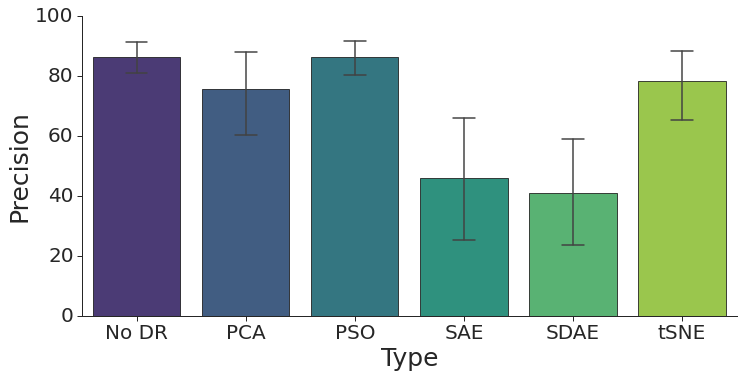

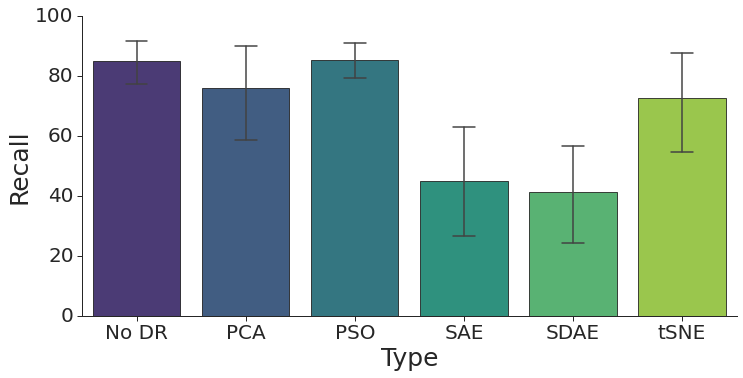

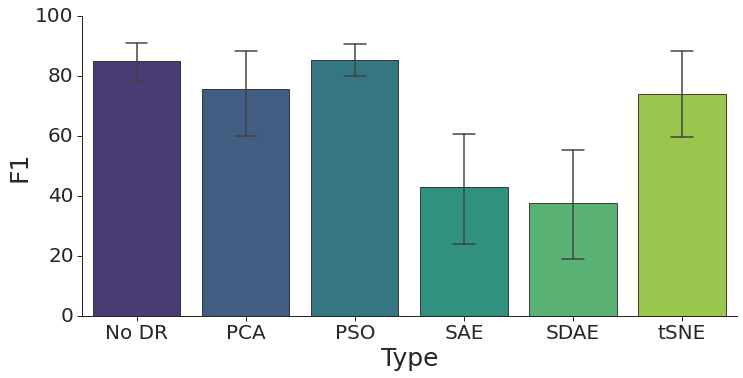

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE PRECITION BAR GRAPH
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sns.set_theme(style="ticks", palette="bright")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_palette("viridis",6)

g = sns.catplot(x="reduction", y="precision", kind="bar", aspect=2,  edgecolor=".1", capsize=0.2,errwidth=1.5, data=df) #REAL
#g = sns.catplot(x="reduction", y="precision", kind="bar", aspect=2, col_wrap=3,  edgecolor=".1", capsize=0.2,errwidth=1.5, data=df) #REAL

g.set_xlabels("Type", size=25)
g.set_ylabels("Precision", size=25)
g.set_xticklabels(size=20)
g.set_yticklabels(labels= [0, 20, 40, 60, 80, 100], fontdict={'fontsize': 20,  'fontweight': 12, 'verticalalignment': 'center', 'horizontalalignment': 'right'})
#plt.legend(loc='lower right', fontsize=15)

g.savefig("/content/drive/MyDrive/BROOKE/preduction_output.png")
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE PRECITION BAR GRAPH
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sns.set_theme(style="ticks", palette="bright")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_palette("viridis",6)

b = sns.catplot(x="reduction", y="recall", kind="bar", aspect=2,  edgecolor=".1", capsize=0.2,errwidth=1.5, data=df) #REAL
#g = sns.catplot(x="reduction", y="precision", kind="bar", aspect=2, col_wrap=3,  edgecolor=".1", capsize=0.2,errwidth=1.5, data=df) #REAL

b.set_xlabels("Type", size=25)
b.set_ylabels("Recall", size=25)
b.set_xticklabels(size=20)
b.set_yticklabels(labels= [0, 20, 40, 60, 80, 100], fontdict={'fontsize': 20,  'fontweight': 12, 'verticalalignment': 'center', 'horizontalalignment': 'right'})
#plt.legend(loc='lower right', fontsize=15)

b.savefig("/content/drive/MyDrive/BROOKE/rreduction_output.png")

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#MAKE PRECITION BAR GRAPH
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
sns.set_theme(style="ticks", palette="bright")
sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20}) 
sns.set_palette("viridis",6)

c = sns.catplot(x="reduction", y="f1", kind="bar", aspect=2,  edgecolor=".1", capsize=0.2,errwidth=1.5,sharey=True, data=df) #REAL
#g = sns.catplot(x="reduction", y="precision", kind="bar", aspect=2, col_wrap=3,  edgecolor=".1", capsize=0.2,errwidth=1.5, data=df) #REAL

c.set_xlabels("Type", size=25)
c.set_ylabels("F1", size=25)
c.set_xticklabels(size=20)
c.set_yticklabels(labels= [0, 20, 40, 60, 80, 100], fontdict={'fontsize': 20,  'fontweight': 12, 'verticalalignment': 'center', 'horizontalalignment': 'right'})
#plt.legend(loc='lower right', fontsize=15)

c.savefig("/content/drive/MyDrive/BROOKE/freduction_output.png")




# ONE WAY ANOVA - FEATURE REDUCTION

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#ONE WAY ANOVA - FEATURE REDUCTION
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#fvalue, pvalue = stats.f_oneway(no_dr_f, pca_f, pso_f, sae_f, sdae_f,tnse_f)


fvalue, pvalue = stats.f_oneway(no_dr_p, pca_p, pso_p, sae_p, sdae_p,tnse_p)
print(fvalue, pvalue)

7.425005384564938 8.273145878858281e-06


In [ ]:
fvalue, pvalue = stats.f_oneway(no_dr_r, pca_r, pso_r, sae_r, sdae_r,tnse_r)
print(fvalue, pvalue)

7.093890231365232 1.410928773807451e-05


# PAIRED TTEST - DATASET

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#PAIRED TTEST - DATASET
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
data = df.sort_values(by=['type'], ignore_index=True)

healthy_p = df.loc[0:29, 'precision']
healthy_r = df.loc[0:29, 'recall']
healthy_f = df.loc[0:29, 'f1']
non_tnbc_p = df.loc[30:59, 'precision']
non_tnbc_r = df.loc[30:59, 'recall']
non_tnbc_f = df.loc[30:59, 'f1']
tnbc_p = df.loc[60:89, 'precision']
tnbc_r = df.loc[60:89, 'recall']
tnbc_f = df.loc[60:89, 'f1']


In [ ]:
#.................
#tnbc and non_tnbc
#`````````````````
print('the independent t-test results for tnbc and non_tnbc')
#PRECISION
tnbc_non_tnbc_p = stats.ttest_ind(tnbc_p,non_tnbc_p)
print('precision: ')
if tnbc_non_tnbc_p[1] < 0.05:
  print('t-statistic = ', tnbc_non_tnbc_p.statistic, 'p-value = ', tnbc_non_tnbc_p.pvalue, 'the results are significant')
if tnbc_non_tnbc_p[1] > 0.05:
  print('the results are not significant')

#RECALL
tnbc_non_tnbc_r = stats.ttest_ind(tnbc_r,non_tnbc_r)
print('recall: ')
if tnbc_non_tnbc_r[1] < 0.05:
  print('t-statistic = ', tnbc_non_tnbc_r.statistic, 'p-value = ', tnbc_non_tnbc_r.pvalue, 'the results are significant')
if tnbc_non_tnbc_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
tnbc_non_tnbc_f = stats.ttest_ind(tnbc_f,non_tnbc_f)
print('F-1: ')
if tnbc_non_tnbc_f[1] < 0.05:
  print('t-statistic = ', tnbc_non_tnbc_f.statistic, 'p-value = ', tnbc_non_tnbc_f.pvalue, 'the results are significant')
if tnbc_non_tnbc_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')
#.................
#healthy and non_tnbc
#`````````````````
print('the independent t-test results for healthy and non_tnbc')
#PRECISION
healthy_non_tnbc_p = stats.ttest_ind(healthy_p,non_tnbc_p)
print('precision: ')
if healthy_non_tnbc_p[1] < 0.05:
  print('t-statistic = ', healthy_non_tnbc_p.statistic, 'p-value = ', healthy_non_tnbc_p.pvalue, 'the results are significant')
if healthy_non_tnbc_p[1] > 0.05:
  print('the results are not significant')

#RECALL
healthy_non_tnbc_r = stats.ttest_ind(healthy_r,non_tnbc_r)
print('recall: ')
if healthy_non_tnbc_r[1] < 0.05:
  print('t-statistic = ', healthy_non_tnbc_r.statistic, 'p-value = ', healthy_non_tnbc_r.pvalue, 'the results are significant')
if healthy_non_tnbc_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
healthy_non_tnbc_f = stats.ttest_ind(healthy_f,non_tnbc_f)
print('F-1: ')
if healthy_non_tnbc_f[1] < 0.05:
  print('t-statistic = ', healthy_non_tnbc_f.statistic, 'p-value = ', healthy_non_tnbc_f.pvalue, 'the results are significant')
if healthy_non_tnbc_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')

#.................
#healthy and tnbc
#`````````````````
print('the independent t-test results for healthy and tnbc')
#PRECISION
healthy_tnbc_p = stats.ttest_ind(healthy_p,tnbc_p)
print('precision: ')
if healthy_tnbc_p[1] < 0.05:
  print('t-statistic = ', healthy_tnbc_p.statistic, 'p-value = ', healthy_tnbc_p.pvalue, 'the results are significant')
if healthy_tnbc_p[1] > 0.05:
  print('the results are not significant')

#RECALL
healthy_tnbc_r = stats.ttest_ind(healthy_r,tnbc_r)
print('recall: ')
if healthy_tnbc_r[1] < 0.05:
  print('t-statistic = ', healthy_tnbc_r.statistic, 'p-value = ', healthy_tnbc_r.pvalue, 'the results are significant')
if healthy_tnbc_r[1] > 0.05:
  print('the results are not significant')

#F-1 SCORE
healthy_tnbc_f = stats.ttest_ind(healthy_f,tnbc_f)
print('F-1: ')
if healthy_tnbc_f[1] < 0.05:
  print('t-statistic = ', healthy_tnbc_f.statistic, 'p-value = ', healthy_tnbc_f.pvalue, 'the results are significant')
if healthy_tnbc_f[1] > 0.05:
  print('the results are not significant')
print('~~~~~~~~~~~~~~~~~')


the independent t-test results for tnbc and non_tnbc
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for healthy and non_tnbc
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~
the independent t-test results for healthy and tnbc
precision: 
the results are not significant
recall: 
the results are not significant
F-1: 
the results are not significant
~~~~~~~~~~~~~~~~~


# FINISH

In [ ]:
%%html
<marquee style='width: 30%; color: hotpink;'><b>We did it!!!!</b></marquee>

In [ ]:
%%html
<marquee style=" width: 30% ;color: hotpink" bgcolor="#ffffff" direction="up" height="80" behavior="alternate" ><b>We did it!!!!</b></marquee>